In [1]:
from train_model import TrainModel

Naive Bayes	TRAIN		0.996336	0.997919	0.997020

Naive Bayes	TEST		0.995168	0.997167	0.995996



In [3]:
import pandas as pd
import numpy as np
from numpy import random
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, classification_report

In [4]:

class PredictModel():
    
    def __init__(self):
        self.data = None
        self.cm = None
        self.classes = None
    
   
    # function to print and plot the confusion matrix
    
    @staticmethod # adding this TypeError: plot_confusion_matrix() got multiple values for argument 'classes' is solved
    def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        """
        given a sklearn confusion matrix (cm), make a nice plot

        Arguments
        ---------
        cm:           confusion matrix from sklearn.metrics.confusion_matrix

        classes: given classification classes such as [0, 1, 2]
                      the class names, for example: ['high', 'medium', 'low']

        normalize:    If False, plot the raw numbers
                      If True, plot the proportions
        
        title:        the text to display at the top of the matrix

        cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                      see http://matplotlib.org/examples/color/colormaps_reference.html
                      plt.get_cmap('jet') or plt.cm.Blues

        Usage
        -----
        plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                                  # sklearn.metrics.confusion_matrix
                              normalize    = True,                # show proportions
                              target_names = y_labels_vals,       # list of names of the classes
                              title        = best_estimator_name) # title of graph

        Citiation
        ---------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

        """
        import itertools
        import numpy as np
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)
        
        accuracy = np.trace(cm) / np.sum(cm).astype('float')
        misclass = 1 - accuracy

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45) 
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.tight_layout()
    
    
        
    # creating prediction classifier
    
    def predict(self):
        
        # load data
        X, y = TrainModel().load_data()
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42 )
        
        # the object to turn data (text) into vectors
        vectorizer = TfidfVectorizer()

        # create doceument term matrix
        dtm = vectorizer.fit_transform(X_train)
        
        model = TrainModel().train_classifier()
        
        y_predicted = model.predict(vectorizer.transform(X_test))
        
        
        print('accuracy %s' % accuracy_score(y_predicted, y_test))
        print(classification_report(y_test, y_predicted)) # target_names=my_label
        
        
        #########################
        cnf_matrix = confusion_matrix(y_test, y_predicted)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure(figsize=(12,10))
        PredictModel().plot_confusion_matrix(cnf_matrix, classes=['network cache', 'service status', 'CP heal instance',
       'CP update resource', 'CP run pending', 'CP sync scheduler',
       'CP clearup migrations', 'CP run image cache', 'CP sync power',
       'broker blocked connection', 'AMQP server pouta1', 'node updating',
       'InvalidSharedStorage_Remote', 'ProcessExecutionError',
       'CP cleanup running instance', 'AMQP server pouta2',
       'floating IP access', 'storing info cache'], title='Confusion matrix, without normalization')
        
        # saving the plot
        plt.savefig('confusion_matrix_plot')
        
    
    

    #@staticmethod- we can use the @staticmethod decorator to avoid the error, If the method doesn't require self as an argument
    def classify(self, data):

        # load classifier
        clf_filename = 'naive_bayes_classifier.pkl'
        nb_clf = pickle.load(open(clf_filename, 'rb'))

        # vectorize the new text
        vec_filename = 'tfidf_vectorizer.pkl'
        vectorizer = pickle.load(open(vec_filename, 'rb'))

        pred = nb_clf.predict(vectorizer.transform([data]))

        print(pred[0])
        #print('accuracy %s' % accuracy_score(pred, y_test))
        #return pred

Naive Bayes	TRAIN		0.996336	0.997919	0.997020

Naive Bayes	TEST		0.995168	0.997167	0.995996

accuracy 0.9971669750231268
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.70      1.00      0.82       112
           2       0.97      1.00      0.99        37
           3       1.00      1.00      1.00       270
           4       1.00      1.00      1.00      1269
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00       273
           7       1.00      1.00      1.00       152
           8       1.00      1.00      1.00       668
           9       1.00      1.00      1.00      1331
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00       154
          14       1.00      1.00      1.00      5035
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00      7898

    accuracy 

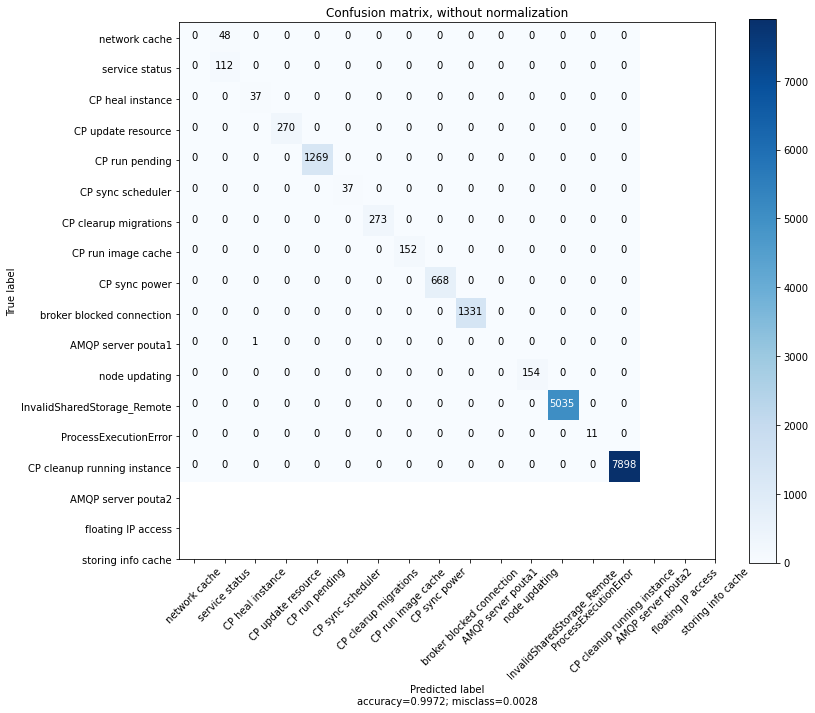

In [5]:
predictModelInstance = PredictModel()
predict_result = predictModelInstance.predict()
predict_result

In [6]:
# deployment in production

new_data ="AMQP server on pouta1:5672 is unreachable: timed out. Trying again in 1 seconds. Client port: None"

predictModelInstance = PredictModel()
classify_data = predictModelInstance.classify(new_data)

1
